In [ ]:
# Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load Stock Data
df = pd.read_csv('/content/AAPL.csv')

In [ ]:
# Drop column from entire dataframe
df = df.drop('Adj Close', axis=1)

In [ ]:
#Technical Indicators

#EMA
ema_period = 12
df['EMA'] = df['Close'].ewm(span=ema_period, adjust=False).mean()

#RSI
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

#MACD
macd_short_period = 12
macd_long_period = 26
macd_signal_period = 9

df['MACD_Line'] = df['Close'].ewm(span=macd_short_period, adjust=False).mean() - df['Close'].ewm(span=macd_long_period, adjust=False).mean()
df['MACD_Signal'] = df['MACD_Line'].ewm(span=macd_signal_period, adjust=False).mean()
df['MACD_Histogram'] = df['MACD_Line'] - df['MACD_Signal']

#KDJ
window = 14
low_min = df['Low'].rolling(window=window).min()
high_max = df['High'].rolling(window=window).max()
df['%K'] = 100 * ((df['Close'] - low_min) / (high_max - low_min))
df['%D'] = df['%K'].rolling(window=3).mean()  # 3-day SMA of %K
df['%J'] = 3 * df['%K'] - 2 * df['%D']

#WILLR (Williams % R)
df['WILLR'] = -100 * ((high_max - df['Close']) / (high_max - low_min))

In [ ]:
# Display the dataset with indicators
df.head()

,Date,Open,High,Low,Close,Volume,EMA,RSI,MACD_Line,MACD_Signal,MACD_Histogram,%K,%D,%J,WILLR
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,212818400,27.332500,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,257142000,27.214038,NaN,-0.061425,-0.012285,-0.049140,NaN,NaN,NaN,NaN
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,263188400,27.114187,NaN,-0.108650,-0.031558,-0.077092,NaN,NaN,NaN,NaN
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,160423600,27.087004,NaN,-0.114696,-0.048186,-0.066511,NaN,NaN,NaN,NaN
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,237458000,27.223234,NaN,-0.035562,-0.045661,0.010099,NaN,NaN,NaN,NaN


In [ ]:
# Remove rows with NaN values
df.dropna(inplace=True)

In [ ]:
# Display the dataset with indicators
df.head()

,Date,Open,High,Low,Close,Volume,EMA,RSI,MACD_Line,MACD_Signal,MACD_Histogram,%K,%D,%J,WILLR
15,2015-01-26,28.434999,28.590000,28.200001,28.275000,222460000,27.598697,66.442618,0.156891,0.036016,0.120875,87.050365,89.582215,81.986665,-12.949635
16,2015-01-27,28.105000,28.120001,27.257500,27.285000,382274800,27.550436,55.811127,0.120245,0.052861,0.067384,43.013125,73.873518,-18.707661,-56.986875
17,2015-01-28,29.407499,29.530001,28.827499,28.827499,585908400,27.746907,62.830945,0.213212,0.084932,0.128280,78.250726,69.438072,95.876033,-21.749274
18,2015-01-29,29.080000,29.797501,28.889999,29.725000,337745600,28.051229,62.123826,0.355215,0.138988,0.216227,97.927063,73.063638,147.653914,-2.072937
19,2015-01-30,29.600000,30.000000,29.212500,29.290001,334982000,28.241809,58.434325,0.427722,0.196735,0.230987,80.810843,85.662877,71.106774,-19.189157


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['Date']))
scaled_df = pd.DataFrame(scaled_data, columns=df.columns[1:])

# Add back the 'Date' column
scaled_df['Date'] = df['Date'].values
scaled_df['Date'] = pd.to_datetime(scaled_df['Date'])
scaled_df.set_index('Date', inplace=True)

In [ ]:
# Display the scaled dataset
scaled_df.head()

,Open,High,Low,Close,Volume,EMA,RSI,MACD_Line,MACD_Signal,MACD_Histogram,%K,%D,%J,WILLR
Date,,,,,,,,,,,,,,
2015-01-26,0.037064,0.035448,0.037208,0.035691,0.305175,0.026585,0.682200,0.481506,0.460357,0.538162,0.870504,0.897503,0.592613,0.870504
2015-01-27,0.035003,0.032511,0.031196,0.029481,0.565617,0.026272,0.567621,0.478922,0.461683,0.527223,0.430131,0.739084,0.240190,0.430131
2015-01-28,0.043137,0.041322,0.041211,0.039156,0.897468,0.027548,0.643276,0.485476,0.464206,0.539676,0.782507,0.694354,0.641225,0.782507
2015-01-29,0.041092,0.042994,0.041610,0.044786,0.493050,0.029525,0.635655,0.495487,0.468458,0.557661,0.979271,0.730917,0.822444,0.979271
2015-01-30,0.044339,0.044259,0.043668,0.042057,0.488546,0.030763,0.595892,0.500599,0.473001,0.560680,0.808108,0.857978,0.554535,0.808108


In [ ]:
# Splitting the data
train_start_date = '2015-01-01'
train_end_date = '2020-12-31'
val_start_date = '2021-01-01'
val_end_date = '2022-12-31'

train_df = scaled_df[(scaled_df.index >= train_start_date) & (scaled_df.index <= train_end_date)]
test_df = scaled_df[(scaled_df.index >= val_start_date) & (scaled_df.index <= val_end_date)]

In [ ]:
# Extract sequences for training
sequence_length = 30
X_train_sequences = np.array([train_df.values[i:i+sequence_length] for i in range(len(train_df) - sequence_length)])
y_train_targets = np.array([train_df['Close'].values[i+sequence_length] for i in range(len(train_df) - sequence_length)])

# Extract sequences for validation
X_test_sequences = np.array([test_df.values[i:i+sequence_length] for i in range(len(test_df) - sequence_length)])
y_test_targets = np.array([test_df['Close'].values[i+sequence_length] for i in range(len(test_df) - sequence_length)])

In [ ]:
#install TensorFlow
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.optimizers import Adam

# Building the LSTM Model
def build_lstm_model(input_shape, lstm_units_list=[128, 64], dropout_rate=0.2):
    model = Sequential()

    # First LSTM layer
    model.add(LSTM(units=lstm_units_list[0], return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout_rate))

    # Second LSTM layer
    model.add(LSTM(units=lstm_units_list[1]))
    model.add(Dropout(dropout_rate))

    # Output layer for regression
    model.add(tf.keras.layers.Dense(1))

    # Compile the model with the specified learning rate
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model

# Create the LSTM model
input_shape = (X_train_sequences.shape[1], X_train_sequences.shape[2])
lstm_model = build_lstm_model(input_shape)

In [ ]:
# Train the model
# Parameters
epochs = 50
batch_size = 32

history = lstm_model.fit(X_train_sequences, y_train_targets,
                                           epochs=epochs,
                                           batch_size=batch_size,
                                           validation_data=(X_test_sequences, y_test_targets),
                                           verbose=1)

Epoch 1/50
46/46 [==============================] - 11s 24ms/step - loss: 0.0173 - val_loss: 0.0014
Epoch 2/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 3/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 4/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 5/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 7/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 8/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 11/50
46/46

In [ ]:
# Save model
lstm_model.save_weights('lstm_model_weights.h5')

In [ ]:
# Upload Stock data & technical indicator model
lstm_model.load_weights('lstm_model_weights.h5')

In [ ]:
from tensorflow.keras.models import Model

def feature_extractor(original_model):
    # new model for feature extraction
    return Model(inputs=original_model.inputs, outputs=original_model.layers[-3].output)

# Get the feature extraction model
extractor = feature_extractor(lstm_model)

# Extract features from the training data
vdt_features = extractor.predict(X_train_sequences)

# Extract features from the validation data
vdt_test_features = extractor.predict(X_test_sequences)

15/15 [==============================] - 0s 3ms/step


In [ ]:
print(vdt_features.shape, vdt_test_features.shape)

(1466, 64) (473, 64)


In [ ]:
# install mplfinance
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


In [ ]:
#Generating Candlestick using historic dataset
import os
import mplfinance as mpf

# Create a directory to save the candlestick images
save_dir = './candlestick_charts_train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Plotting the candlestick chart with the necessary components for the entire dataset
for start in range(0, len(train_df) - 30):  # Slide by one day for overlapping 30-day candlestick charts
    end = start + 30
    mpf.plot(train_df.iloc[start:end], type='candle', style='charles',
             title=f'AAPL Candlestick Chart {start}-{end}',
             ylabel='Stock Price',
             ylabel_lower='Trade Volume',
             mav=(10), volume=True,
             savefig=os.path.join(save_dir, f'train_candlestick_{start}.png'))  # Save the chart in the designated directory

# Verification of the image count
saved_images_train = [f for f in os.listdir(save_dir) if f.startswith('train_candlestick_') and f.endswith('.png')]
print("Number of saved images:", len(saved_images_train))
print("Expected number of images:", len(train_df) - 30)

Number of saved images: 1466
Expected number of images: 1466


In [ ]:
import os
import mplfinance as mpf

# Create a directory to save the candlestick images
save_dir = './candlestick_charts_test'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Plotting the candlestick chart with the necessary components for the entire dataset
for start in range(0, len(test_df) - 30):  # Slide by one day for overlapping 30-day candlestick charts
    end = start + 30
    mpf.plot(test_df.iloc[start:end], type='candle', style='charles',
             title=f'AAPL Candlestick Chart {start}-{end}',
             ylabel='Stock Price',
             ylabel_lower='Trade Volume',
             mav=(10), volume=True,
             savefig=os.path.join(save_dir, f'test_candlestick_{start}.png'))  # Save the chart in the designated directory

# Verification of the image count
saved_images_test = [f for f in os.listdir(save_dir) if f.startswith('test_candlestick_') and f.endswith('.png')]
print("Number of saved images:", len(saved_images_test))
print("Expected number of images:", len(test_df) - 30)

Number of saved images: 473
Expected number of images: 473


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Reshape, Bidirectional, LSTM

def build_candlestick_extraction_model(input_shape):
    model = Sequential()

    # Convolutional Layers
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Flatten and Reshape for LSTM
    model.add(Flatten())
    model.add(Reshape((-1, 128)))  # Reshape based on the flattened output

    # BiLSTM Layers
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Bidirectional(LSTM(32)))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

input_shape = (390, 290, 3)
candlestick_extraction_model = build_candlestick_extraction_model(input_shape)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np

def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(390, 290))
    img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
    return img_array

# Directory where the candlestick images are saved
train_save_dir = './candlestick_charts_train'
test_save_dir = './candlestick_charts_test'

# Load training images
train_image_paths = [os.path.join(train_save_dir, fname) for fname in os.listdir(train_save_dir) if fname.startswith('train_candlestick_') and fname.endswith('.png')]
X_train_images = np.array([load_and_preprocess_image(img_path) for img_path in train_image_paths])

# Load test images
test_image_paths = [os.path.join(test_save_dir, fname) for fname in os.listdir(test_save_dir) if fname.startswith('test_candlestick_') and fname.endswith('.png')]
X_test_images = np.array([load_and_preprocess_image(img_path) for img_path in test_image_paths])

In [ ]:
print(X_train_images.shape, X_train_sequences.shape )
print(X_test_images.shape, X_test_sequences.shape )

(1466, 390, 290, 3) (1466, 30, 14)
(473, 390, 290, 3) (473, 30, 14)


In [ ]:
assert X_train_sequences.shape[0] == X_train_images.shape[0]
assert X_test_sequences.shape[0] == X_test_images.shape[0]

In [ ]:
# Predict the next day's closing price after each 30 window
y_train_targets = train_df['Close'].values[30:]
y_test_targets = test_df['Close'].values[30:]

In [ ]:
# Find the last index of 2020
end_2020_index = scaled_df.index.get_loc(scaled_df[scaled_df.index <= '2020-12-31'].iloc[-1].name)
end_2022_index = scaled_df.index.get_loc(scaled_df[scaled_df.index > '2020-12-31'].iloc[-1].name)

# Calculate how many 30-day windows fit into this data
# We subtract an additional 29 days because we want to ensure we have a full 30-day window at the end of 2020
num_windows_up_to_2020 = end_2020_index
num_windows_after_2020 = end_2022_index

# Split the candlestick images and targets based on this number
X_train_candlestick = X_train_images[:num_windows_up_to_2020]
X_test_candlestick = X_test_images[:num_windows_after_2020]
y_train_candlestick = y_train_targets[:num_windows_up_to_2020]
y_test_candlestick = y_test_targets[:num_windows_after_2020]

print('X_train_candlestick:', X_train_candlestick.shape)
print('y_train_candlestick:',y_train_candlestick.shape)
print('X val candlestick:', X_test_candlestick.shape)
print('y val candlestick:',y_test_candlestick.shape)

X_train_candlestick: (1466, 390, 290, 3)
y_train_candlestick: (1466,)
X val candlestick: (473, 390, 290, 3)
y val candlestick: (473,)


In [ ]:
  # Train the model
  # Parameters
  epochs = 50
  batch_size = 32

  history = candlestick_extraction_model.fit(X_train_candlestick, y_train_candlestick,
                                            epochs=epochs,
                                            batch_size=batch_size,
                                            validation_data=(X_test_candlestick, y_test_candlestick),
                                            verbose=1)

In [ ]:
loss = candlestick_extraction_model.evaluate(X_val_candlestick, y_val_candlestick, verbose=0)
print(f"Validation Loss: {loss}")

In [ ]:
#Model Saving:
candlestick_extraction_model.save('candlestick_feature_extractor_model.keras')

In [ ]:
# Upload savel candle stick model
loaded_model = tf.keras.models.load_model('candlestick_feature_extractor_model.keras')

In [ ]:
vc_features = candlestick_extraction_model.predict(X_train_candlestick)
vc_test_features = candlestick_extraction_model.predict(X_test_candlestick)

15/15 [==============================] - 2s 140ms/step


In [ ]:
# Concatenate the features for training data
state_train = np.concatenate([vdt_features, vc_features], axis=1)

# Concatenate the features for testing data
state_test = np.concatenate([vdt_test_features, vc_test_features], axis=1)

print(state_train.shape, state_test.shape)

(1466, 128) (473, 128)


In [ ]:
import numpy as np

class TradingEnvironment:
    def __init__(self, state_data, scaled_df, initial_capital=100000, transaction_cost=0.001):
        self.df = state_data
        self.scaled_df = scaled_df
        self.initial_capital = initial_capital
        self.transaction_cost = transaction_cost
        self.current_capital = self.initial_capital
        self.done = False
        self.net_worths = [initial_capital]
        self.returns = []

        # Initialize the stock price here
        self.stock_price = self.scaled_df.iloc[0]['Close']

    def reset(self):
        self.current_step = 0
        self.current_capital = self.initial_capital
        self.stock_owned = 0
        self.stock_price = self.scaled_df.iloc[self.current_step]['Close']
        self.net_worths = [self.initial_capital]
        self.returns = []
        self.state = self._get_state()
        self.done = False
        return self.state

    def _get_state(self):
        """Combine necessary elements to represent the state"""
        # This can be expanded to include features from technical indicators and candlestick charts.
        return [self.current_capital, self.stock_price]

    def _compute_net_worth(self):
        return self.current_capital + self.stock_owned * self.stock_price

    def _compute_reward(self, new_net_worth):
        profit_loss = new_net_worth - self.net_worths[-1]
        if len(self.net_worths) > 1:
            self.returns.append((new_net_worth - self.net_worths[-2]) / self.net_worths[-2])

        std_dev = np.std(self.returns)
        if std_dev < 1e-10:  # Using a threshold instead of directly checking against zero
           sharpe_ratio = 0
        else:
           sharpe_ratio = np.mean(self.returns) / std_dev

        # Handle potential NaN or Inf values
        if np.isnan(sharpe_ratio) or np.isinf(sharpe_ratio):
           sharpe_ratio = 0

        reward = profit_loss + sharpe_ratio
        return reward

    def step(self, action):
        self.current_step += 1

        if self.current_step >= len(self.scaled_df) - 1:
            self.done = True

        self.stock_price = self.scaled_df.iloc[self.current_step]['Close']

        if action == 1:  # Long (Buy)
            amount_to_buy = self.current_capital // self.stock_price
            self.current_capital -= amount_to_buy * self.stock_price * (1 + self.transaction_cost)
            self.stock_owned += amount_to_buy
        elif action == -1:  # Short (Sell)
            self.current_capital += self.stock_owned * self.stock_price * (1 - self.transaction_cost)
            self.stock_owned = 0
        # No need for action == 0 as it's just holding the stock

        new_net_worth = self._compute_net_worth()
        self.net_worths.append(new_net_worth)

        reward = self._compute_reward(new_net_worth)

        return self._get_state(), reward, self.done

    def action_space(self):
        """Return action space."""
        return [-1, 0, 1] # Short, Neutral, Long

    def state_shape(self):
        return (len(self._get_state()),)

In [ ]:
import keras
from keras.models import Model
from keras.layers import Dense, Input, Lambda, Subtract
from keras.optimizers import Adam
from keras.layers import Add
import random
from collections import deque

class DoubleDuelingDQNAgent:
    def __init__(self, state_size, action_size, learning_rate=0.0001, discount_factor=0.99,
                 epsilon_decay=0.995, epsilon_min=0.01, batch_size=32, memory_size=1000, episodes=50):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = 0.6
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.batch_size = batch_size
        self.memory = deque(maxlen=memory_size)

        # Adjusting epsilon_decay to span the given number of episodes
        self.epsilon_decay = np.exp(np.log(self.epsilon_min / self.epsilon) / episodes)

        # Create main model and target model
        self.model = self._build_dueling_model()
        self.target_model = self._build_dueling_model()
        self.update_target_model()

    def _build_dueling_model(self):
        inputs = Input(shape=(self.state_size,))
        x = Dense(24, activation='relu')(inputs)
        x = Dense(24, activation='relu')(x)

        # Dueling DQN
        state_value = Dense(1, activation='linear')(x)
        state_value = Lambda(lambda s: keras.backend.expand_dims(s[:, 0], -1), output_shape=(self.action_size,))(state_value)

        action_advantages = Dense(self.action_size, activation='linear')(x)
        action_advantages = Lambda(lambda a: a[:, :] - keras.backend.mean(a[:, :], keepdims=True),
                                   output_shape=(self.action_size,))(action_advantages)

        x = Add()([state_value, action_advantages])

        model = Model(inputs=inputs, outputs=x)
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))

        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        # Epsilon-greedy action selection
        if np.random.rand() <= self.epsilon:
            return random.choice([-1, 0, 1])  # Choose from the action space
        q_values = self.model.predict(state)
        # Map the action index to the action value
        action_map = {0: -1, 1: 0, 2: 1}
        return action_map[np.argmax(q_values[0])]

    def replay(self):
        if len(self.memory) < self.batch_size:
            return
        minibatch = random.sample(self.memory, self.batch_size)

        states = np.array([tup[0][0] for tup in minibatch])
        actions = np.array([tup[1] for tup in minibatch])
        rewards = np.array([tup[2] for tup in minibatch])
        next_states = np.array([tup[3][0] for tup in minibatch])
        done = np.array([tup[4] for tup in minibatch])

        # Double DQN logic
        # Selecting action from model and get Q-value for this action from target model
        target = rewards + (1 - done) * self.discount_factor * np.amax(self.target_model.predict(next_states), axis=1)
        target_current = self.model.predict(states)
        target_current[range(self.batch_size), actions] = target

        self.model.train_on_batch(states, target_current)

    def update_target_model(self):
        # Set the target model weights to the main model weights
        self.target_model.set_weights(self.model.get_weights())

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

In [ ]:
#Metrics Calculation

def compute_metrics(net_worths, risk_free_rate=0.001, total_days=365):

    # 1. Profit Rate (PR)
    initial_assets = net_worths[0]
    final_assets = net_worths[-1]
    PR = (final_assets - initial_assets) / initial_assets

    # 2. Annualized Rate of Return (AR)
    t = len(net_worths)
    if PR < -1:
      AR = -1
    else:
      AR = (1 + PR) ** (total_days / t) - 1

    # 3. Sharpe Ratio (SR)
    daily_returns = [(net_worths[i] - net_worths[i-1]) / net_worths[i-1] for i in range(1, len(net_worths))]
    avg_daily_return = np.mean(daily_returns)
    std_dev_return = np.std(daily_returns)
    threshold = 1e-10  #Erro Handling Threshold
    if std_dev_return < threshold:
      SR = 0
    else:
      SR = (avg_daily_return - risk_free_rate) / std_dev_return

    # 4. Maximum Drawdown Duration (MDD)
    peak = net_worths[0]
    max_drawdown = 0
    for net_worth in net_worths[1:]:
        if net_worth > peak:
            peak = net_worth
        drawdown = (peak - net_worth) / peak
        if drawdown > max_drawdown:
            MDD = drawdown

    return PR, AR, SR, MDD

In [ ]:
# Training the Agent
import time
import gc  # For garbage collection
import tracemalloc  # For memory profiling

# Initialize the trading environment
env = TradingEnvironment(scaled_df=train_df, state_data=state_train)

# Initialize Double Dueling DQN agent
state_size = env.state_shape()[0]
action_size = len(env.action_space())
agent = DoubleDuelingDQNAgent(state_size, action_size)

EPISODES = 50
TMAX = len(state_train)  # maximum number of timesteps per episode

# Store the rewards for each episode
episode_rewards = []

# Start memory profiling
tracemalloc.start()

# Training loop
for episode in range(EPISODES):

    # Start time
    start_time = time.time()

    # Reset environment
    state = env.reset()
    state = np.reshape(state, [1, env.state_shape()[0]])
    total_reward = 0

    for t in range(TMAX):
        # Agent takes action
        action = agent.act(state)

        # Apply the action to the environment
        next_state, reward, done = env.step(action)
        next_state = np.reshape(next_state, [1, env.state_shape()[0]])

        # Store experience in the agent's memory and let the agent learn
        agent.remember(state, action, reward, next_state, done)
        agent.replay()

        # Update the state and store the reward
        state = next_state
        total_reward += reward

        if done:
            break

    # Update the target Q-network
    agent.update_target_model()

    # Decay the epsilon (exploration factor) after each episode
    agent.decay_epsilon()

    # Store the total reward for the episode
    episode_rewards.append(total_reward)
    print(f"Episode {episode + 1}/{EPISODES} - Reward: {total_reward}")

    # End time
    end_time = time.time()

    # Display memory usage and episode duration
    current, peak = tracemalloc.get_traced_memory()
    print(f"Episode {episode + 1} memory usage: {current / 10**6}MB; Peak: {peak / 10**6}MB")
    print(f"Episode duration: {end_time - start_time} seconds")

    if episode % 2 == 0:  # Save the model weights every 2 episodes
        agent.save(f"dqn_agent_episode{episode}.h5")

    if episode == EPISODES - 1:
        agent.save(f"dqn_agent_final.h5")

    # Clear memory
    gc.collect()

# Stop memory profiling
tracemalloc.stop()

1/1 [==============================] - 0s 20ms/step
Episode 1/1 - Reward: 56.372133494657724
Episode 1 memory usage: 55.545931MB; Peak: 55.99849MB
Episode duration: 307.6338336467743 seconds


In [ ]:
#Evaluating DQN agent with test dataset

validation_env = TradingEnvironment(scaled_df=test_df, state_data=state_test)
val_state = validation_env.reset()
val_state = np.reshape(val_state, [1, validation_env.state_shape()[0]])
val_total_reward = 0

for t in range(len(state_test)):
    action = agent.act(val_state)  # exploit only, no exploration
    next_state_val, reward_val, done = validation_env.step(action)
    val_state = next_state_val
    val_state = np.reshape(next_state_val, [1, validation_env.state_shape()[0]])
    val_total_reward += reward_val
    if done:
        break

print(f"Validation Total Reward: {val_total_reward}")

# Metrics calculation for DQN agent
net_worths = validation_env.net_worths
PR, AR, SR, MDD = compute_metrics(net_worths)
print(f"DQN Agent:")
print(f"Profit Rate: {PR}")
print(f"Annualized Rate of Return: {AR}")
print(f"Sharpe Ratio: {SR}")
print(f"Maximum Drawdown Duration: {MDD}")

1/1 [==============================] - 0s 24ms/step
Validation Total Reward: 34.274323806871536
DQN Agent:
Profit Rate: 0.20473808048795517
Annualized Rate of Return: 0.1542257119008401
Sharpe Ratio: -0.030685481270680867
Maximum Drawdown Duration: 0.25910716452758353


In [ ]:
# Comparison with Baselines

# Buy & Hold Strategy with metrics

def buy_and_hold_strategy(test_data):
    initial_price = test_data.iloc[0]['Close']
    final_price = test_data.iloc[-1]['Close']

    initial_capital = 100000  # Starting with $100,000
    stocks_bought = initial_capital / initial_price
    final_net_worth = stocks_bought * final_price

    return final_net_worth

final_net_worth_BnH = buy_and_hold_strategy(test_df)

PR_BnH = (final_net_worth_BnH - 100000) / 100000  # Profit rate
AR_BnH = PR_BnH / len(test_df) * 252  # Annualized return, assuming 252 trading days in a year

# For B&H, there's no trading, so the Sharpe Ratio will be the average return divided by the standard deviation of returns.
# The Maximum Drawdown will be the maximum drop from the highest point in the test dataset.

daily_returns = test_df['Close'].pct_change().dropna()
SR_BnH = np.mean(daily_returns) / np.std(daily_returns) * np.sqrt(252)  # Annualized Sharpe Ratio
MDD_BnH = (test_df['Close'].min() - test_df['Close'].max()) / test_df['Close'].max()

print(f"Buy and Hold Strategy:")
print(f"Profit Rate (PR): {PR_BnH}")
print(f"Annualized Rate (AR): {AR_BnH}")
print(f"Sharpe Ratio (SR): {SR_BnH}")
print(f"Maximum Drawdown (MDD): {MDD_BnH}")

Buy and Hold Strategy:
Profit Rate (PR): 0.004867671197394375
Annualized Rate (AR): 0.0024386742380584146
Sharpe Ratio (SR): 0.18869831680738627
Maximum Drawdown (MDD): -0.41179235155822114


In [ ]:
#LSTM-based Agent

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Training dataset (2015 - 2020)
sequence_length = 30 #Sliding time window
X_train = np.array([train_df.values[i:i+sequence_length] for i in range(len(train_df) - sequence_length)])
y_train = np.array([train_df['Close'].values[i+sequence_length] for i in range(len(train_df) - sequence_length)])

# Testing dataset (2021 - 2022)
X_test = np.array([test_df.values[i:i+sequence_length] for i in range(len(test_df) - sequence_length)])
y_test = np.array([test_df['Close'].values[i+sequence_length] for i in range(len(test_df) - sequence_length)])

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2)) # reduce overfitting
model.add(LSTM(units=64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), shuffle=False, callbacks=[early_stop])

#Prediction
predicted_prices = model.predict(X_test)

#Trading Strategy
threshold = 0.01
actions = [1 if (predicted_prices[i][0] - X_test[i, -1, -1]) / X_test[i, -1, -1] > threshold else -1 for i in range(len(predicted_prices) - 1)] # 1 for Buy/Hold, -1 for Sell

#Evaluation
initial_capital = 100000
capital = initial_capital
stock_qty = 0
net_worths = [initial_capital]

# Iterate through prices and actions to compute net worth over time
for i in range(len(y_test) - 1):
    if actions[i] == 1:
        # Buy (or hold). Calculate how many stocks you can buy
        stock_qty += capital // y_test[i]
        capital -= stock_qty * y_test[i]
    elif actions[i] == -1:
        # Sell
        capital += stock_qty * y_test[i]
        stock_qty = 0

    # Compute net worth and store
    net_worth = capital + stock_qty * y_test[i]
    net_worths.append(net_worth)

# Calculate evaluation metrics
PR, AR, SR, MDD = compute_metrics(net_worths)
print(f"LSTM Agent:")
print(f"Profit Rate (PR): {PR}")
print(f"Annualized Rate (AR): {AR}")
print(f"Sharpe Ratio (SR): {SR}")
print(f"Maximum Drawdown (MDD): {MDD}")

Epoch 1/50
46/46 [==============================] - 8s 40ms/step - loss: 0.0033 - val_loss: 0.0153
Epoch 2/50
46/46 [==============================] - 1s 11ms/step - loss: 0.0192 - val_loss: 0.0105
Epoch 3/50
46/46 [==============================] - 1s 11ms/step - loss: 0.0464 - val_loss: 0.1337
Epoch 4/50
46/46 [==============================] - 1s 11ms/step - loss: 0.0265 - val_loss: 0.1107
Epoch 5/50
46/46 [==============================] - 1s 11ms/step - loss: 0.0073 - val_loss: 0.0135
Epoch 6/50
46/46 [==============================] - 1s 11ms/step - loss: 0.0018 - val_loss: 0.0095
Epoch 7/50
46/46 [==============================] - 1s 11ms/step - loss: 0.0012 - val_loss: 0.0115
Epoch 8/50
46/46 [==============================] - 1s 11ms/step - loss: 0.0024 - val_loss: 0.0094
Epoch 9/50
46/46 [==============================] - 1s 11ms/step - loss: 0.0027 - val_loss: 0.0056
Epoch 10/50
46/46 [==============================] - 1s 12ms/step - loss: 0.0034 - val_loss: 0.0060
Epoch 11/

In [ ]:
# Total number of "Buy/Hold" actions taken by the agent
buy_actions_count = actions.count(1)

# Total number of "Sell" actions taken by the agent.
sell_actions_count = actions.count(-1)

print(buy_actions_count, sell_actions_count)

333 139


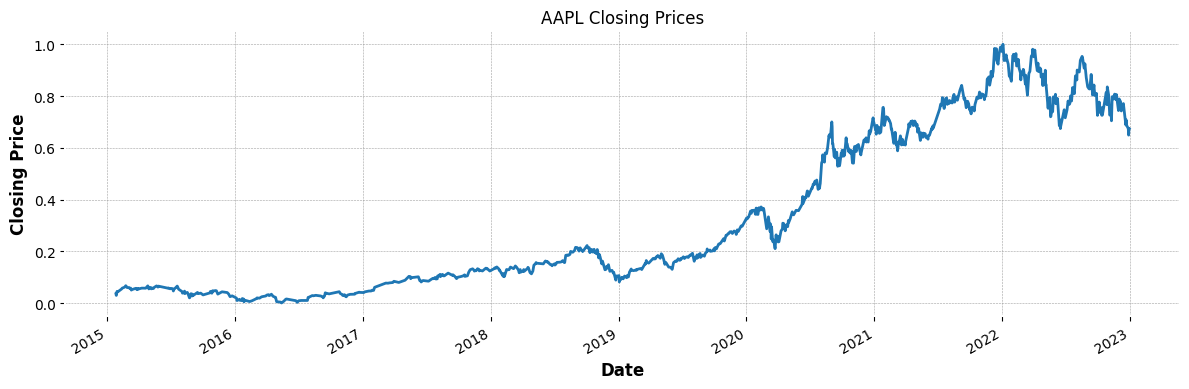

In [ ]:
# Comparison with different segmentation

import pandas as pd
import matplotlib.pyplot as plt

# Plot the closing prices
plt.figure(figsize=(12, 4))
scaled_df['Close'].plot(title='AAPL Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Segmenting the data based on the identified periods
volatile_period = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2020-06-30')]
growth_period = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2021-12-31')]
decline_period = df[(df['Date'] >= '2021-06-01') & (df['Date'] <= '2022-02-28')]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Function to scale dataframes
def scale_data(df):
    scaled_data = df.copy()
    for column in ['Open', 'High', 'Low', 'Close', 'Volume']:
        scaled_data[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))
    return scaled_data

# Scale each segment
volatile_period_scaled = scale_data(volatile_period)
growth_period_scaled = scale_data(growth_period)
decline_period_scaled = scale_data(decline_period)

In [ ]:
segments = {
    'volatile_period': volatile_period_scaled,
    'growth_period': growth_period_scaled,
    'decline_period': decline_period_scaled
}

evaluation_results = {}
segment_actions = {} # Dictionary to store actions for each segment

for segment_name, segment_data in segments.items():
    # Split the segment data into training and validation subsets
    train_size = int(0.8 * len(segment_data))
    train_data = segment_data[:train_size]
    validation_data = segment_data[train_size:]

    # Initialize the trading environment and DQN agent for the segment
    env = TradingEnvironment(state_data=train_data, scaled_df=train_data)
    state_size = env.state_shape()[0]
    action_size = len(env.action_space())
    agent = DoubleDuelingDQNAgent(state_size, action_size)

    # Training the RL agent on the training subset of the segment
    EPISODES = 50
    for episode in range(EPISODES):
        state = env.reset()
        state = np.reshape(state, [1, state_size])
        done = False
        while not done:
            action = agent.act(state)
            next_state, reward, done = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            agent.replay()
        agent.update_target_model()

    # Save the trained RL agent's model
    agent_model_name = f"{segment_name}_dqn_agent.h5"
    agent.save(agent_model_name)

    # Load the saved RL agent model for evaluation
    agent.load(agent_model_name)

    # Initialize a new environment with the validation data for evaluation
    validation_env = TradingEnvironment(state_data=validation_data, scaled_df=validation_data, initial_capital=100000)

    # Evaluating the RL agent on the validation subset of the segment
    net_worths = [validation_env.initial_capital]
    state = validation_env.reset()
    state = np.reshape(state, [1, state_size])
    done = False
    actions_taken = []  # Initialize the list before the loop
    while not done:
        action = agent.act(state)
        actions_taken.append(action)  # Record the action
        next_state, _, done = validation_env.step(action)
        net_worths.append(validation_env._compute_net_worth())
        state = np.reshape(next_state, [1, state_size])

    segment_actions[segment_name] = actions_taken  # Save the actions for the segment

    # Calculate the evaluation metrics for the segment
    PR, AR, SR, MDD = compute_metrics(net_worths)

    evaluation_results[segment_name] = {
        'PR': PR,
        'AR': AR,
        'SR': SR,
        'MDD': MDD
    }

# Analysis of actions
def analyze_actions(actions, segment_name):
    buy_actions = actions.count(1)
    hold_actions = actions.count(0)
    sell_actions = actions.count(-1)

    print(f"\nAnalysis for {segment_name}:")
    print(f"Buy actions: {buy_actions}")
    print(f"Hold actions: {hold_actions}")
    print(f"Sell actions: {sell_actions}")

    if segment_name == 'volatile_period':
        if buy_actions > sell_actions:
            print("Model might be buying more frequently than ideal during volatility.")
        else:
            print("Model is selling frequently during volatility, which might be ideal.")
    elif segment_name == 'growth_period':
        if buy_actions > sell_actions:
            print("Model is capitalizing on the growth by buying more frequently, which is ideal.")
        else:
            print("Model might be selling more frequently than ideal during growth.")
    elif segment_name == 'decline_period':
        if sell_actions > buy_actions:
            print("Model is mitigating losses by selling more frequently during the decline, which is ideal.")
        else:
            print("Model might be buying more frequently than ideal during the decline.")

for segment_name, actions in segment_actions.items():
    analyze_actions(actions, segment_name)

print(evaluation_results)

1/1 [==============================] - 0s 19ms/step

Analysis for volatile_period:
Buy actions: 13
Hold actions: 6
Sell actions: 5
Model might be buying more frequently than ideal during volatility.

Analysis for growth_period:
Buy actions: 63
Hold actions: 33
Sell actions: 55
Model is capitalizing on the growth by buying more frequently, which is ideal.

Analysis for decline_period:
Buy actions: 10
Hold actions: 15
Sell actions: 12
Model is mitigating losses by selling more frequently during the decline, which is ideal.
{'volatile_period': {'PR': 0.38788591156415614, 'AR': 118.77467525009486, 'SR': 0.3654545030164677, 'MDD': 0.047773065217560896}, 'growth_period': {'PR': 0.2898833388429233, 'AR': 0.8427503422596443, 'SR': 0.06253567112549009, 'MDD': 0.016681280568188645}, 'decline_period': {'PR': -0.2385836186333996, 'AR': -0.9270626073932169, 'SR': -0.10512178538718385, 'MDD': 0.3238047830668173}}


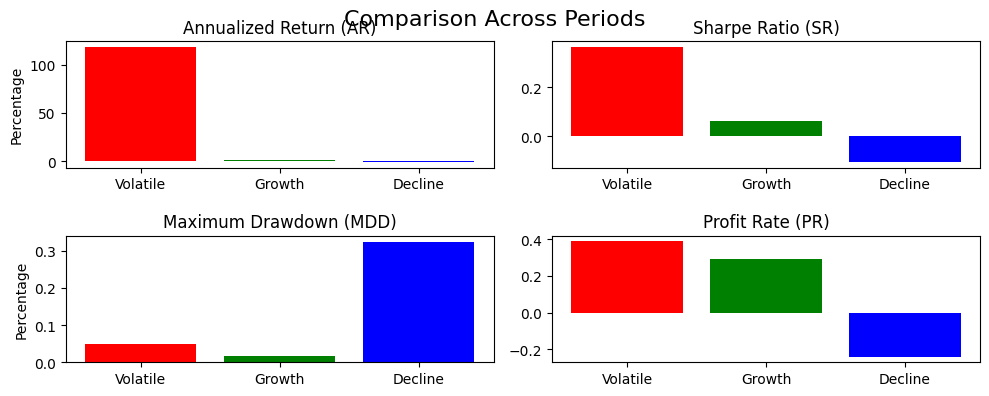

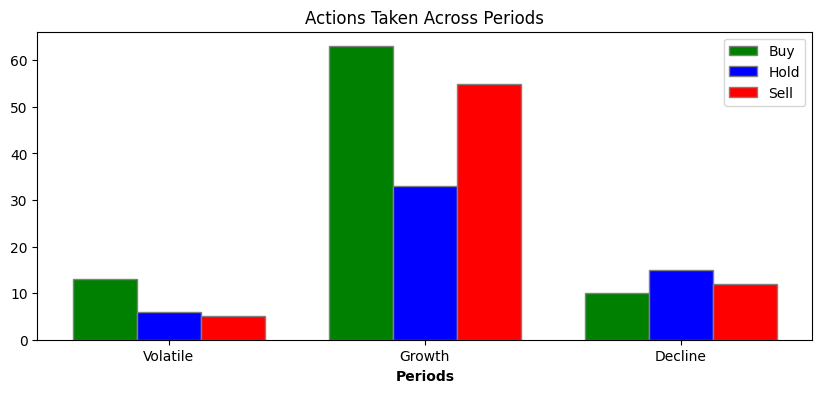

In [ ]:
import matplotlib.pyplot as plt

# Data
periods = ['Volatile', 'Growth', 'Decline']
AR_values = [118.775, 0.843, -0.927]
SR_values = [0.365, 0.063, -0.105]
MDD_values = [0.048, 0.017, 0.324]
PR_values = [0.388, 0.290, -0.239]
buy_actions = [13, 63, 10]
hold_actions = [6, 33, 15]
sell_actions = [5, 55, 12]

# Performance Metrics Plot
fig, axes = plt.subplots(2, 2, figsize=(10, 4))
fig.suptitle('Comparison Across Periods', fontsize=16)

axes[0, 0].bar(periods, AR_values, color=['red', 'green', 'blue'])
axes[0, 0].set_title('Annualized Return (AR)')
axes[0, 0].set_ylabel('Percentage')

axes[0, 1].bar(periods, SR_values, color=['red', 'green', 'blue'])
axes[0, 1].set_title('Sharpe Ratio (SR)')

axes[1, 0].bar(periods, MDD_values, color=['red', 'green', 'blue'])
axes[1, 0].set_title('Maximum Drawdown (MDD)')
axes[1, 0].set_ylabel('Percentage')

axes[1, 1].bar(periods, PR_values, color=['red', 'green', 'blue'])
axes[1, 1].set_title('Profit Rate (PR)')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

# Actions Plot
fig, ax = plt.subplots(figsize=(10, 4))

barWidth = 0.25
r1 = np.arange(len(buy_actions))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

ax.bar(r1, buy_actions, color='green', width=barWidth, edgecolor='grey', label='Buy')
ax.bar(r2, hold_actions, color='blue', width=barWidth, edgecolor='grey', label='Hold')
ax.bar(r3, sell_actions, color='red', width=barWidth, edgecolor='grey', label='Sell')

ax.set_xlabel('Periods', fontweight='bold')
ax.set_xticks([r + barWidth for r in range(len(buy_actions))])
ax.set_xticklabels(periods)
ax.set_title('Actions Taken Across Periods')
ax.legend()

plt.show()

In [ ]:
# Ablation Experiment

# Training Stock data and technical indicator model

import time
import gc
import tracemalloc

# Initialize the trading environment
vdt_env = TradingEnvironment(scaled_df=train_df, state_data=vdt_features)

# Initialize Double Dueling DQN agent
state_size = vdt_env.state_shape()[0]
action_size = len(vdt_env.action_space())
agent = DoubleDuelingDQNAgent(state_size, action_size)

EPISODES = 50
TMAX = len(vdt_features)  # maximum number of timesteps per episode

# Store the rewards for each episode
episode_rewards = []

# Start memory profiling
tracemalloc.start()

# Training loop
for episode in range(EPISODES):

    # Start time
    start_time = time.time()

    # Reset environment
    state = vdt_env.reset()
    state = np.reshape(state, [1, vdt_env.state_shape()[0]])
    total_reward = 0

    for t in range(TMAX):
        # Agent takes action
        action = agent.act(state)

        # Apply the action to the environment
        next_state, reward, done = vdt_env.step(action)
        next_state = np.reshape(next_state, [1, vdt_env.state_shape()[0]])

        # Store experience in the agent's memory and let the agent learn
        agent.remember(state, action, reward, next_state, done)
        agent.replay()

        # Update the state and store the reward
        state = next_state
        total_reward += reward

        if done:
            break

    # Update the target Q-network
    agent.update_target_model()

    # Decay the epsilon (exploration factor) after each episode
    agent.decay_epsilon()

    # Store the total reward for the episode
    episode_rewards.append(total_reward)
    print(f"Episode {episode + 1}/{EPISODES} - Reward: {total_reward}")

    # End time
    end_time = time.time()

    # Display memory usage and episode duration
    current, peak = tracemalloc.get_traced_memory()
    print(f"Episode {episode + 1} memory usage: {current / 10**6}MB; Peak: {peak / 10**6}MB")
    print(f"Episode duration: {end_time - start_time} seconds")

    if episode == EPISODES - 1:
        agent.save(f"vdt_agent_final.h5")

    # Clear memory
    gc.collect()

# Stop memory profiling
tracemalloc.stop()

1/1 [==============================] - 0s 20ms/step
Episode 1/1 - Reward: 56.928781710058196
Episode 1 memory usage: 23.760078MB; Peak: 26.877208MB
Episode duration: 332.77916526794434 seconds


In [ ]:
#Evaluating Stock data and technical indicators model with test dataset

state_val = vdt_val_features
vdt_val_env = TradingEnvironment(scaled_df=test_df, state_data=vdt_test_features)
val_state = vdt_val_env.reset()
val_state = np.reshape(val_state, [1, vdt_val_env.state_shape()[0]])
val_total_reward = 0

for t in range(len(vdt_test_features)):
    action = agent.act(val_state)
    next_state_val, reward_val, done = vdt_val_env.step(action)
    val_state = next_state_val
    val_state = np.reshape(next_state_val, [1, vdt_val_env.state_shape()[0]])
    val_total_reward += reward_val
    if done:
        break

print(f"Validation Total Reward: {val_total_reward}")

net_worths = vdt_val_env.net_worths  # Retrieve the net worths list
PR, AR, SR, MDD = compute_metrics(net_worths)
print(f"Stock and Technical:")
print(f"Profit Rate: {PR}")
print(f"Annualized Rate of Return: {AR}")
print(f"Sharpe Ratio: {SR}")
print(f"Maximum Drawdown Duration: {MDD}")

1/1 [==============================] - 0s 18ms/step
Validation Total Reward: -3.4353433131350744
Stock and Technical:
Profit Rate: -0.03306669254605731
Annualized Rate of Return: -0.025560894283207625
Sharpe Ratio: -0.46740924365800235
Maximum Drawdown Duration: 0.05400743123414484


In [ ]:
# Training candlestick chart model

import time
import gc
import tracemalloc

# Initialize the trading environment
vc_env = TradingEnvironment(scaled_df=train_df, state_data=vc_features)

# Initialize Double Dueling DQN agent
state_size = vc_env.state_shape()[0]
action_size = len(vc_env.action_space())
agent = DoubleDuelingDQNAgent(state_size, action_size)

EPISODES = 50
TMAX = len(vc_features)  # maximum number of timesteps per episode

# Store the rewards for each episode
episode_rewards = []

# Start memory profiling
tracemalloc.start()

# Training loop
for episode in range(EPISODES):

    # Start time
    start_time = time.time()

    # Reset environment
    state = vc_env.reset()
    state = np.reshape(state, [1, vc_env.state_shape()[0]])
    total_reward = 0

    for t in range(TMAX):
        # Agent takes action
        action = agent.act(state)

        # Apply the action to the environment
        next_state, reward, done = vc_env.step(action)
        next_state = np.reshape(next_state, [1, vc_env.state_shape()[0]])

        # Store experience in the agent's memory and let the agent learn
        agent.remember(state, action, reward, next_state, done)
        agent.replay()

        # Update the state and store the reward
        state = next_state
        total_reward += reward

        if done:
            break

    # Update the target Q-network
    agent.update_target_model()

    # Decay the epsilon (exploration factor) after each episode
    agent.decay_epsilon()

    # Store the total reward for the episode
    episode_rewards.append(total_reward)
    print(f"Episode {episode + 1}/{EPISODES} - Reward: {total_reward}")

    # End time
    end_time = time.time()

    # Display memory usage and episode duration
    current, peak = tracemalloc.get_traced_memory()
    print(f"Episode {episode + 1} memory usage: {current / 10**6}MB; Peak: {peak / 10**6}MB")
    print(f"Episode duration: {end_time - start_time} seconds")

    if episode == EPISODES - 1:
        agent.save(f"vc_agent_final.h5")

    # Clear memory
    gc.collect()

# Stop memory profiling
tracemalloc.stop()

1/1 [==============================] - 0s 19ms/step
Episode 1/1 - Reward: 65.79758437122383
Episode 1 memory usage: 19.36241MB; Peak: 26.009754MB
Episode duration: 325.5238256454468 seconds


In [ ]:
#Evaluating candlestick chart model with test dataset

vc_val_env = TradingEnvironment(scaled_df=test_df, state_data=vc_test_features)
val_state = vc_val_env.reset()
val_state = np.reshape(val_state, [1, vc_val_env.state_shape()[0]])
val_total_reward = 0

for t in range(len(vc_test_features)):
    action = agent.act(val_state)
    next_state_val, reward_val, done = vc_val_env.step(action)
    val_state = next_state_val
    val_state = np.reshape(next_state_val, [1, vc_val_env.state_shape()[0]])
    val_total_reward += reward_val
    if done:
        break

print(f"Validation Total Reward: {val_total_reward}")

net_worths = vc_val_env.net_worths  # Retrieve the net worths list
PR, AR, SR, MDD = compute_metrics(net_worths)
print(f"Candlestick Chart:")
print(f"Profit Rate: {PR}")
print(f"Annualized Rate of Return: {AR}")
print(f"Sharpe Ratio: {SR}")
print(f"Maximum Drawdown Duration: {MDD}")

1/1 [==============================] - 0s 18ms/step
Validation Total Reward: -6.265472586744361
Candlestick Chart:
Profit Rate: -0.18414932687768334
Annualized Rate of Return: -0.14505831823825022
Sharpe Ratio: -0.06746644917884298
Maximum Drawdown Duration: 0.196459254384449
